## sklearn.linear_model.LinearRegression
* class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

[67.30998637]


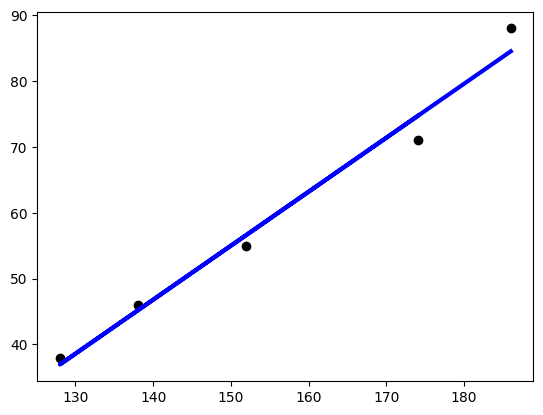

In [41]:
import matplotlib.pyplot as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]
reg.fit(X,y)

print(reg.predict([[165]]))

# 학습 데이터와 y값을 산포도로 그린다
plt.scatter(X, y, color='black')

# 학습 데이터를 입력으로 하여 예측값을 계산한다
y_pred = reg.predict(X)

# 학습 데이터와 예측값으로 선그래프로 그린다
# 계산된 기울기와 y절편을 가지는 직선이 그려진다
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

In [42]:
from sklearn.datasets import load_diabetes

diabets = load_diabetes()

In [43]:
diabets.data.shape

(442, 10)

In [44]:
diabets.target.shape

(442,)

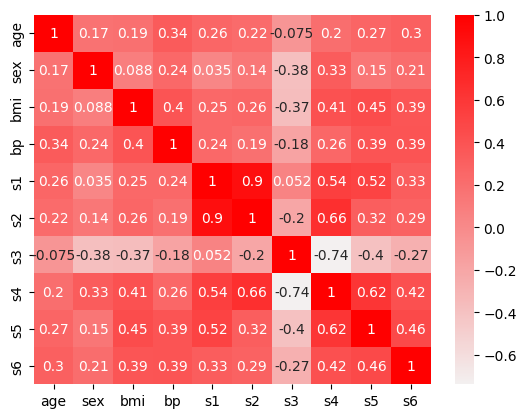

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets

# 당뇨병 데이터 세트를 적재한다
diabetes = datasets.load_diabetes()

# 학습 데이터와 테스트 데이터를 분리한다
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabets.data, diabets.target, test_size=0.2, random_state=0)

# 선형 회귀 모델로 학습을 수행
model = LinearRegression()
model.fit(X_train, y_train)
df_diabetes=pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_diabetes.corr()
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(df_diabetes.corr(), annot=True, cmap=cmap)
plt.show()

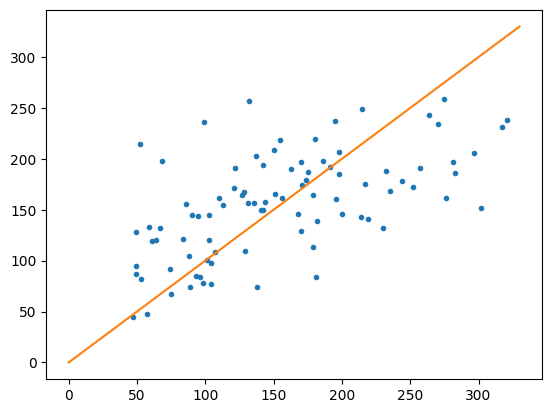

In [46]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 실제 데이터와 예측 데이터를 비교
plt.plot(y_test, y_pred, '.')

# 직선을 그리기 위하여 완벽한 선형 데이터를 생성
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [47]:
y_preds = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse)

3424.259334298691 58.51717127731561


In [49]:
df_diabetes_dr1 = df_diabetes.drop("s4", axis=1)

X_train,X_test,y_train,y_test= train_test_split(df_diabetes_dr1,diabetes.target,test_size=0.2, random_state=0)

In [50]:
model=LinearRegression()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse)

3438.420410927494 58.63804576320304


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

# 데이터 스케일링 - StandardScaler 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_preds = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
variance_score = r2_score(y_test, y_preds)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Variance Score: {variance_score:.3f}")


MSE: 3424.259
RMSE: 58.517
Variance Score: 0.332


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diabetes=load_diabetes()
X_train,X_test,y_train,y_test= train_test_split(diabetes.data,diabetes.target,test_size=0.2, random_state=0)

model=LinearRegression()
model.fit(X_train,y_train)

## 처음 데이터 그대로
from sklearn.metrics import mean_squared_error,r2_score
y_target=diabetes.target
X_data=df_diabetes
X_train,X_test,y_train,y_test= train_test_split(X_data,y_target,test_size=0.3, random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

## (s1,s4)drop한 것
from sklearn.metrics import mean_squared_error,r2_score
y_target=diabetes.target
X_data=df_diabetes.drop(['s1','s4'],axis=1)
X_train,X_test,y_train,y_test= train_test_split(X_data,y_target,test_size=0.3, random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

## StandardScaler해서 한 거
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df_diabetes)
df_diabete =scaler.transform(df_diabetes)

y_target=diabetes.target
X_data=df_diabete
X_train,X_test,y_train,y_test= train_test_split(X_data,y_target,test_size=0.3, random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 2993.705, RMSE:54.715
Variance score:0.497
MSE : 2923.970, RMSE:54.074
Variance score:0.509
MSE : 2993.705, RMSE:54.715
Variance score:0.497
